In [1]:
import pandas as pd
import numpy as np
from collections import Counter
import matplotlib as mpl
import matplotlib.pyplot as plt
plt.rcParams['font.sans-serif'] = ['SimHei']
plt.rcParams['axes.unicode_minus'] = False    
import seaborn as sns
sns.set_palette("BuGn_r")#调色

In [2]:
def show_values(axs, orient="v", space=.01):
    def _single(ax):
        if orient == "v":
            for p in ax.patches:
                _x = p.get_x() + p.get_width() / 2
                _y = p.get_y() + p.get_height() + (p.get_height()*0.01)
                value = '{:.1f}'.format(p.get_height())
                ax.text(_x, _y, value, ha="center") 
        elif orient == "h":
            for p in ax.patches:
                _x = p.get_x() + p.get_width() + float(space)
                _y = p.get_y() + p.get_height() - (p.get_height()*0.5)
                value = '{:.1f}'.format(p.get_width())
                ax.text(_x, _y, value, ha="left")

    if isinstance(axs, np.ndarray):
        for idx, ax in np.ndenumerate(axs):
            _single(ax)
    else:
        _single(axs)

In [3]:
#读取数据
data = pd.read_excel('../data/清洗数据.xlsx')
data.head()

,Date,Contest number,Word,Number of reported results,Number in hard mode,1 try,2 tries,3 tries,4 tries,5 tries,6 tries,7 or more tries (X)
0,2022-01-07,202,slump,80630.0,1362.0,1.000000,3.000000,23.000000,39.000000,24.000000,9.000000,1.000000
1,2022-01-08,203,crank,101503.0,1763.0,1.000000,5.000000,23.000000,31.000000,24.000000,14.000000,2.000000
2,2022-01-09,204,gorge,91477.0,1913.0,1.000000,3.000000,13.000000,27.000000,30.000000,22.000000,4.000000
3,2022-01-10,205,query,107134.0,2242.0,1.000000,4.000000,16.000000,30.000000,30.000000,17.000000,2.000000
4,2022-01-11,206,drink,153880.0,3017.0,0.990099,8.910891,34.653465,33.663366,15.841584,4.950495,0.990099


## 词性

In [4]:
#词性提取

import nltk
column_name = ['tags']
temp = []
for i in data['Word']:
    tag = nltk.tag.pos_tag([i])
    tag_row = [tag[0][1]]
    temp.append(tag_row)
temp = pd.DataFrame(temp,columns = column_name)
data = pd.concat([data,temp],axis=1)


NN      319
JJ       17
RB       10
VB        3
VBG       3
MD        2
DT        1
PRP$      1
JJR       1
VBN       1
NNS       1
Name: tags, dtype: int64


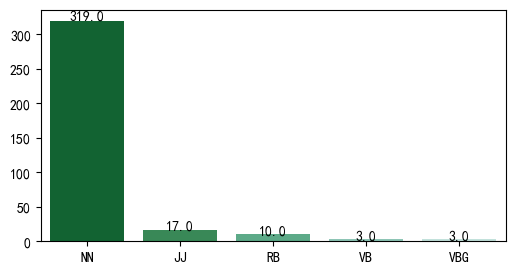

In [5]:
#词性特征可视乎
#value_count
print(data['tags'].value_counts())

#可视化
plt.figure(figsize=(6,3))
a = sns.barplot(x = list(data['tags'].value_counts()[0:5].index), y = list(data['tags'].value_counts()[0:5]))
show_values(a)

In [6]:
# 特征简化
data.loc[~((data['tags'] == 'NN' )| (data['tags'] == 'JJ')),'tags'] = 'others'

## 元音字母

In [7]:
#元音字母数量提取

def countVowels(word): #统计函数
    word = word.lower()
    vowels = "aeiou"
    count = 0
    for i in word: #循环遍历
        if i in vowels: 
            count += 1  #计数
    
    return count 

data['Vowels nums']=data['Word'].apply(lambda x:countVowels(x))

2    216
1    105
3     35
0      3
Name: Vowels nums, dtype: int64


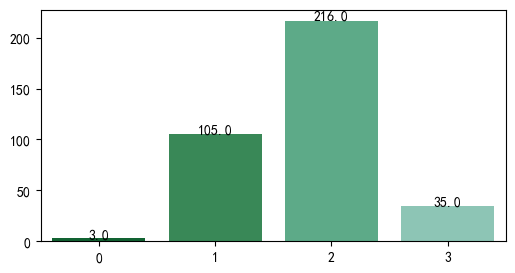

In [8]:
#元音字母数量特征可视化
print(data['Vowels nums'].value_counts())

#可视化
plt.figure(figsize=(6,3))
b = sns.barplot(x = list(data['Vowels nums'].value_counts().index), y = list(data['Vowels nums'].value_counts()))
show_values(b)

## 词缀

In [9]:
#词缀提取

def countRoot(word):
    word = word.lower()
    root_list = ['er','or','ic','al']
    count = 0
    for root in root_list:
        if root in word:
            count += 1 
    return count

data['Combined nums']=data['Word'].apply(lambda x:countRoot(x))

0    286
1     73
Name: Combined nums, dtype: int64


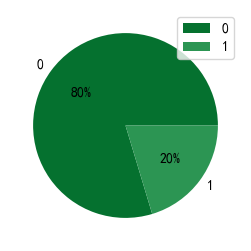

In [10]:
#词缀数量特征可视化
print(data['Combined nums'].value_counts())

#可视化
data_v = list(data['Combined nums'].value_counts())
labels = list(data['Combined nums'].value_counts().index)
plt.figure(figsize=(6,3))
plt.pie(data_v,labels = labels,autopct = '%0.0f%%')
plt.legend()

## 字母数量

In [11]:
#字母数量特征提取
'''
aa='a、b、c、d、e、f、g、h、i、j、k、l、m、n、o、p、q、r、s、t、u、v、w、x、y、z'.split('、')
bb=[0]*26 #26个字母出现的频率
for i in data['Word']:
    tt=Counter(i.strip())
    for j in tt:
        bb[aa.index(j)] += tt[j]
print('每个字母出现的频次',bb)

#26个字母频率提取

temp=[]
column_name = ['Letter feq']

for i in data['Word']:
    tt=Counter(i.strip())
    nums = 0 #单词所含字母的数量占总体样本的总数量
    for j in tt:
        nums += bb[aa.index(j)]
    temp.append(nums)
temp=pd.DataFrame(temp,columns=column_name)
data=pd.concat([data,temp],axis=1)
'''

"\naa='a、b、c、d、e、f、g、h、i、j、k、l、m、n、o、p、q、r、s、t、u、v、w、x、y、z'.split('、')\nbb=[0]*26 #26个字母出现的频率\nfor i in data['Word']:\n    tt=Counter(i.strip())\n    for j in tt:\n        bb[aa.index(j)] += tt[j]\nprint('每个字母出现的频次',bb)\n\n#26个字母频率提取\n\ntemp=[]\ncolumn_name = ['Letter feq']\n\nfor i in data['Word']:\n    tt=Counter(i.strip())\n    nums = 0 #单词所含字母的数量占总体样本的总数量\n    for j in tt:\n        nums += bb[aa.index(j)]\n    temp.append(nums)\ntemp=pd.DataFrame(temp,columns=column_name)\ndata=pd.concat([data,temp],axis=1)\n"

In [12]:
#利用摩斯密码进行频数的提取(附加)
morse = {'e':12000,'t':9000,'a':8000,'i':8000,'n':8000,'o':8000,'s':8000,'h':6400,'r':6200,'d':4400,'l':4000,'u':3000,
'c':3000,'m':3000,'f':2500,'w':2000,'y':2000,'g':1700,'p':1700,'b':1600,'v':1200,'k':800,'q':500,'j':400,'x':400,'z':200}

temp=[]
column_name = ['Letter feq']

for i in data['Word']:
    tt=Counter(i.strip())
    nums = 0 
    for j in tt:
        nums += morse[j]
    temp.append(nums)
temp=pd.DataFrame(temp,columns=column_name)
data=pd.concat([data,temp],axis=1)

<AxesSubplot:xlabel='Letter feq', ylabel='Density'>

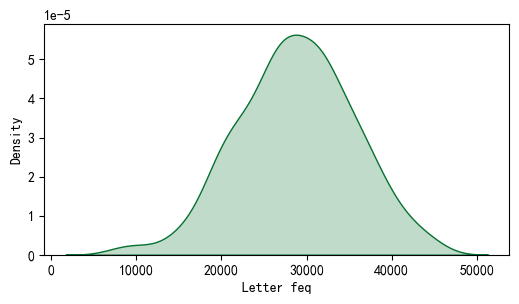

In [13]:
#字母数量特征可视化
plt.figure(figsize=(6,3))
sns.kdeplot(data=data['Letter feq'], shade=True)

## 字母重复数量

In [14]:
#字母重复数量特征

data['Letter rep'] = data['Word'].apply(lambda x:(5-len(set(x))))

0    259
1     94
2      6
Name: Letter rep, dtype: int64


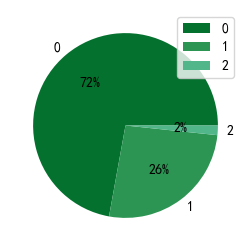

In [15]:
#字母重复数量特征可视化
print(data['Letter rep'].value_counts())

#可视化
data_v = list(data['Letter rep'].value_counts())
labels = list(data['Letter rep'].value_counts().index)
plt.figure(figsize=(6,3))
plt.pie(data_v,labels=labels,autopct = '%0.0f%%')
plt.legend()


## 使用频率

In [16]:
#使用频率特征——引入Coca单词表(pass)

def find_word(word_list,database):
    return database[database['  WORD'].isin(word_list)]
    
coca = pd.read_excel('../data/COCA60000.xlsx')
#大写转小写
coca['  WORD'] = coca['  WORD'].apply(lambda x:x.lower().strip())
word_list = list(data['Word'])
table_1 = find_word(word_list,coca)
table_1.drop_duplicates(subset='  WORD',inplace=True)
data = pd.merge(data,table_1,left_on = 'Word',right_on = "  WORD",how = 'outer')
data.drop(['  WORD','PoS','RANK #','SPOKEN','FICTION','MAGAZINE','NEWSPAPER','ACADEMIC'],axis = 1,inplace=True)
data.rename(columns={'TOTAL':'Word feq'},inplace=True)

C:\Users\sty007\AppData\Local\Temp\ipykernel_6968\1885791621.py:11: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  table_1.drop_duplicates(subset='  WORD',inplace=True)


<AxesSubplot:xlabel='Word feq', ylabel='Density'>

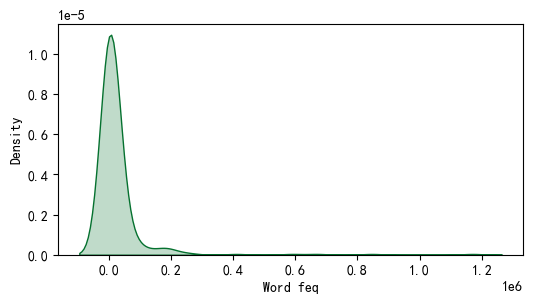

In [17]:
#词频可视化
plt.figure(figsize=(6,3))
sns.kdeplot(data=data['Word feq'], shade=True)

## 星期转换&工作日休息日转换

In [18]:
#星期转换
# 判断当前日期为周几，周一为0，依次增加  
data['week']=data['Date'].apply(lambda x:x.weekday())
data['is_weekend'] = data['week'].apply(lambda x:x>4)

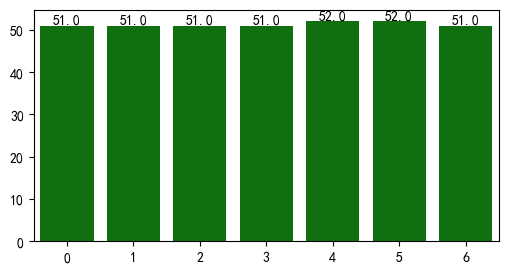

In [19]:
#星期转换可视化
plt.figure(figsize=(6,3))
e = sns.barplot(x = list(data['week'].value_counts().index), y = list(data['week'].value_counts()),color = 'green')
show_values(e)

## 字母频率特征提取

In [20]:
#单词切分
words = data['Word'].apply(func = list)
df_word = pd.DataFrame(data = [ i for i in words.values] ,columns = ['char1','char2','char3','char4','char5'])
data[df_word.columns] = df_word

## 困难模式百分比计算

In [21]:
#困难模式百分比计算

data['Hard percent']=data['Number in hard mode']/data['Number of  reported results']

<AxesSubplot:xlabel='Date', ylabel='Hard percent'>

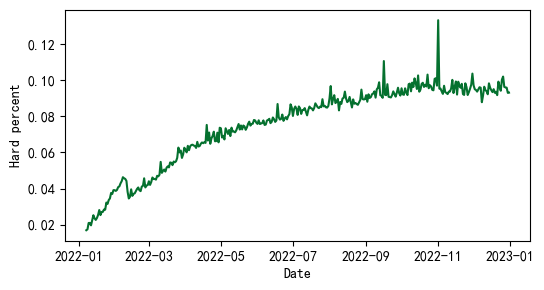

In [22]:
#困难模式百分比可视化
plt.figure(figsize=(6,3))
sns.lineplot(x='Date',y='Hard percent',data = data)

In [23]:
#困难模式百分比划分
threshold = data['Hard percent'].median()
print(threshold)
def judge (percent,threshold):
    if percent > threshold:
        return 'hard'
    else:
        return 'easy'


data['Hard percent half'] = data['Hard percent'].apply(lambda x:judge(x,threshold))

0.0835138234169958


In [24]:
data.columns

Index(['Date', 'Contest number', 'Word', 'Number of  reported results',
       'Number in hard mode', '1 try', '2 tries', '3 tries', '4 tries',
       '5 tries', '6 tries', '7 or more tries (X)', 'tags', 'Vowels nums',
       'Combined nums', 'Letter feq', 'Letter rep', 'Word feq', 'week',
       'is_weekend', 'char1', 'char2', 'char3', 'char4', 'char5',
       'Hard percent', 'Hard percent half'],
      dtype='object')

In [25]:
data

,Date,Contest number,Word,Number of reported results,Number in hard mode,1 try,2 tries,3 tries,4 tries,5 tries,...,Word feq,week,is_weekend,char1,char2,char3,char4,char5,Hard percent,Hard percent half
0,2022-01-07,202,slump,80630.0,1362.0,1.000000,3.000000,23.000000,39.000000,24.000000,...,3284.0,4,False,s,l,u,m,p,0.016892,easy
1,2022-01-08,203,crank,101503.0,1763.0,1.000000,5.000000,23.000000,31.000000,24.000000,...,2121.0,5,True,c,r,a,n,k,0.017369,easy
2,2022-01-09,204,gorge,91477.0,1913.0,1.000000,3.000000,13.000000,27.000000,30.000000,...,1762.0,6,True,g,o,r,g,e,0.020912,easy
3,2022-01-10,205,query,107134.0,2242.0,1.000000,4.000000,16.000000,30.000000,30.000000,...,1864.0,0,False,q,u,e,r,y,0.020927,easy
4,2022-01-11,206,drink,153880.0,3017.0,0.990099,8.910891,34.653465,33.663366,15.841584,...,34617.0,1,False,d,r,i,n,k,0.019606,easy
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
354,2022-12-27,556,condo,20879.0,2012.0,0.000000,2.000000,17.000000,35.000000,29.000000,...,3064.0,1,False,c,o,n,d,o,0.096365,hard
355,2022-12-28,557,impel,20160.0,1937.0,0.000000,3.030303,21.212121,40.404040,25.252525,...,552.0,2,False,i,m,p,e,l,0.096081,hard
356,2022-12-29,558,havoc,20001.0,1919.0,0.000000,2.000000,16.000000,38.000000,30.000000,...,1715.0,3,False,h,a,v,o,c,0.095945,hard
357,2022-12-30,559,molar,21204.0,1973.0,0.000000,4.040404,21.212121,38.383838,26.262626,...,324.0,4,False,m,o,l,a,r,0.093048,hard


In [26]:
#导出文档，之后的函数都是试用的
data.to_excel("../data/特征提取.xlsx",index=False)

In [27]:
'''
#26个字母频率提取(pass)
aa='a、b、c、d、e、f、g、h、i、j、k、l、m、n、o、p、q、r、s、t、u、v、w、x、y、z'.split('、')
temp=[]
for i in data['Word']:
    tt=Counter(i.strip())
    bb=[0]*26
    for j in tt:
        bb[aa.index(j)]=tt[j]
    temp.append(bb)
temp=pd.DataFrame(temp,columns=aa)
data=pd.concat([data,temp],axis=1)
'''

"\n#26个字母频率提取(pass)\naa='a、b、c、d、e、f、g、h、i、j、k、l、m、n、o、p、q、r、s、t、u、v、w、x、y、z'.split('、')\ntemp=[]\nfor i in data['Word']:\n    tt=Counter(i.strip())\n    bb=[0]*26\n    for j in tt:\n        bb[aa.index(j)]=tt[j]\n    temp.append(bb)\ntemp=pd.DataFrame(temp,columns=aa)\ndata=pd.concat([data,temp],axis=1)\n"